![banner](../banner.jpg)

***[Workshop 3](about) - Training course in data analysis for genomic surveillance of African malaria vectors***

---

# Module 4 - Detecting taxonomic and geographical population structure using neighbour-joining trees (NJT).


## Theme: Analysis



In this module we're going to investigate genetic structure by constructing neighbour-joining trees (NJTs) using genome variation data from the [MalariaGEN Vector Observatory](https://www.malariagen.net/vobs/) [Ag3.0 release](https://www.malariagen.net/data_package/ag30-anopheles-gambiae-data-resource/). We will use functions in the malariagen_data python package to run and plot NJTs, then learn how interpret the results to discover both taxonomic and geographic structure in mosquito populations.



## Learning Objectives

## LectureAt the end of this module you will be able to:

- Construct neighbour-joining trees across different mosquito cohorts.

- Plot trees and interpret results.

- Use NJTs to discover taxonomic and geographic population structure.

## Lecture

### English

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/nNHql0s5mmQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### French

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/a1On0sHZ4nc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## What is taxonomic structure?

In Ag3.0 there are 2,784 wild-caught mosquitoes collected from 19 countries in sub-Saharan Africa. This includes mosquitoes from three known species within the _Anopheles gambiae_ species complex. We expect that any two mosquitoes from the same species will be more closely related than two mosquitoes from different species. This will hopefully be intuitive, because mosquitoes will prefer to mate with individuals of the same species, even if they live alongside mosquitoes from other species and can hybridise. This is also known as **reproductive isolation** and it may be caused by different drivers, _e.g._, **behavioural** differences leading to a lower likelihood of mating. Genomic differences accumulate between species with restricted gene flow over time with more divergence expected between species that have been reproductively isolated for longer.

<img src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-3/behavioural-isolation.png"></img>

## What is population structure?

We might expect that two mosquitoes, of the same species, sampled from the same location, will be more closely related than two mosquitoes sampled from distant locations. These non-random patterns of relatedness are known as population structure. This is based on the assumption that mosquitoes may travel to find a mate, but may only be willing or able to travel a certain distance. Mosquitoes may also be impeded from travelling in certain directions by natural physical barriers, such as a region of elevated terrain, or by variation in the availability of suitable habitat. These limits and barriers to movement can thus generate population structure, also known as **geographic isolation**.

<img src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-3/geographic-isolation.png"></img>

For both taxonomic and population structure we may have some idea of what to expect based on our knowledge of previous studies, but we may be surprised.

For example, the _Anopheles gambiae_ species complex continues to be unravelled, and there may be cryptic species that we were not previously aware of (_e.g._ see [Crawford _et al._ 2016](https://pubmed.ncbi.nlm.nih.gov/26846876/) and [Tennessen _et al._ 2020](https://doi.org/10.1111/mec.15756)). We will return to this topic with an entire workshop about discovering cryptic species.

Also, recent studies have suggested that some malaria mosquitoes may engage in long-distance migration ([Huestis _et al._ 2019](https://pubmed.ncbi.nlm.nih.gov/31578527/)), challenging the previous view that mosquitoes generally don't travel more than a few kilometres in their lifetimes ([Service 1997](https://pubmed.ncbi.nlm.nih.gov/9439109/)). But we still don't know to what extent long-distance migration occurs, or whether the rate or range of migration varies between geographical regions and/or mosquito species. We would also like to learn more about how ecological and landscape variation affects the movement and interbreeding of mosquito populations in different regions of Africa.

In short, we would like to investigate taxonomic and population structure, and we can use genetic variation data to do that. There are various methods for analysing taxonomic and population structure, but in this module we will focus on using a particular type of phylogenetic tree known as a neighbour-joining tree, then compare and contrast this with another method - principal component analysis - towards the end.

## What is a phylogenetic tree?

Phylogenetic trees are used to represent the evolutionary relationships between sampled individuals. These individuals (often called the **tips** or **leaves** of the tree) are connected together by tree **branches** with their length representing the amount of genetic change that has occured between individuals. For example, this might be based on the number of single nucloetide polymorphism (SNP) differences when comparing the genomic sequences of individuals (SNPs are introduced in [Workshop1 Module 4](https://anopheles-genomic-surveillance.github.io/workshop-1/module-4-vgsc-snps.html#single-nucleotide-polymorphisms-snps)). Individual branches are internally connected together by **parent nodes**. These nodes represent common ancestors inferred from the data. The common ancestor of all individuals in the tree is represented by its root. A tree is **rooted** when we know and have sampled the common ancestor of the individuals being analysed (often refered to as an **outgroup**) and means we can infer the order of the branching events. An **unrooted** tree can be constructed without this information but we cannot infer the direction of the evolutionary path without applying a timescale based on known mutation rates, _i.e._ a molecular clock.

<img src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-4/njt_tree.png" width="1000" ></img>

## What are neighbour-joining trees?

A neighbour-joining tree is a type of phylogenetic tree based on the concept of minimum evolution. This concept assumes that the tree with the shortest sum of branch lengths is the correct tree, _i.e._ the principle of parsimony - the simplest solution is the most likely. The number of genomic differences, _e.g._ SNPs, observed between individuals can be represented by a distance matrix.

Neighbour-joining trees are derived by determining which individuals at the end of the tree branches are neighbours by clustering together the closest related individuals in a interative process.

In this simplified example below, a neighbour-joining tree is constructed from four individuals from different taxa. First, the leaves with the minimum distance between them are joined as neighbours. In the example below, these are taxa B and taxa C with a distance of 50 SNPs difference.

<img src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-4/njt_figa.png" width="800" ></img>

In an iterative process, the distance matrix is then recalculated using the distance of the remaining leaves to the B/C parent node. The next most closely related pair are joined as  neighbours. In this case taxa A and taxa D have the minimum distance between them.

<img src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-4/njt_figb.png" width="600" ></img>

The distance matrix continues to be recalculated until all neighbours and subtrees are joined together by minimum distance. In our example, there was just one subtree pair left to be joined. These were the parent nodes A/D and B/C, resulting in the completed neighbour joining tree presented below.

<img src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-4/njt_figc.png" width="600" ></img>

# Set up

Now that we have covered some of the theoretical background of neighbour-joining trees and looked at a simple example with four samples, let's install and import the Python package `malariagen_data` that we can use to generate NJTs with hundreds or thousands of individuals.

In [1]:
%pip install -q --no-warn-conflicts malariagen_data

Note: you may need to restart the kernel to use updated packages.


Note that authentication is required to access data through the package, more details can be found [here](https://malariagen.github.io/vector-data/vobs/vobs-data-access.html).

In [2]:
import malariagen_data
import os

## Saving NJT results

Some NJT runs may take a while to complete, particularly if you're running this code on a service with modest computational resources such as Google Colab, because genotype calls from tens of millions of SNPs may need to be scanned to identify and extract the data.

To avoid having to rerun these analyses, we'll save the results so we can come back to them later. In Google Colab, you can save results to your Google Drive, which will mean you don't lose results even if you leave the notebook and come back several days later.

When mounting your Google Drive you will need to follow the authorization instructions.

In [3]:
try:
    # if running on colab, mount Google drive
    from google.colab import drive
    drive.mount('drive')
except ImportError:
    # For course maintainers, turn off progress logging.
    import os
    os.environ["MGEN_SHOW_PROGRESS"] = "0"
    # For course maintainers, configure the plotly renderer.
    import plotly.io as pio
    pio.renderers.default = "notebook_connected+plotly_mimetype"

With our Google Drive now mounted, we can define and make a directory where we want to save our NJT results.


In [4]:
results_dir = "drive/MyDrive/Colab Data/ag3-structure-results"
os.makedirs(results_dir, exist_ok=True)

In Google Colab, we can actually see our mounted drive and NJT results directory by clicking on the file tab on the left hand side of the screen.

Next we should setup the `malariagen_data` package. As we want to save our NJT results in the Google Drive folder we just set up, we'll use the `results_cache` parameter and assign our results directory to it. If we were running this notebook locally, then we could assign a local folder to this parameter and the NJT results would instead get stored on our hard drive.

In [5]:
ag3 = malariagen_data.Ag3(results_cache=results_dir)
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release_master_us_central1
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10, 3.11, 3.12, 3.13, 3.14
Results cache           : /home/kellylbennett/github/anopheles-genomic-surveillance.github.io/docs/workshop-3/drive/MyDrive/Colab Data/ag3-structure-results
Cohorts analysis        : 20250131
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 15.0.1
Client location         : Iowa, United States (Google Cloud us-central1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v15.0.1/Ag3.html

The output of ag3 shows us the “Client location”. This is where our Google Colab virtual machine is running on the cloud. As the data we would like to analyse is physically stored in the US, we should check that our notebook is running there too. If not, click “Runtime > Disconnect and delete runtime” from the menu, then re-run the notebook and check again.

# The ag3.plot_njt() function

We can generate and plot a neighbour-joining tree using the `malariagen_data` function ag3.plot_njt(). Before we start, let's have a quick look at the documention using “?”

In [6]:
ag3.plot_njt?

Signature:
ag3.plot_njt(
    region: Union[str, malariagen_data.util.Region, Mapping, List[Union[str, malariagen_data.util.Region, Mapping]], Tuple[Union[str, malariagen_data.util.Region, Mapping], ...]],
    n_snps: int,
    color: Union[str, Mapping, NoneType] = None,
    symbol: Union[str, Mapping, NoneType] = None,
    algorithm: Literal['dynamic', 'rapid', 'canonical'] = 'dynamic',
    metric: Literal['cityblock', 'euclidean', 'sqeuclidean'] = 'cityblock',
    distance_sort: Optional[bool] = None,
    count_sort: Optional[bool] = None,
    center_x: int | float = 0,
    center_y: int | float = 0,
    arc_start: int | float = 0,
    arc_stop: int | float = 6.283185307179586,
    width: Optional[int] = 800,
    height: Optional[int] = 600,
    show: bool = True,
    renderer: Optional[str] = None,
    render_mode: Literal['auto', 'svg', 'webgl'] = 'svg',
    title: Union[str, bool, NoneType] = True,
    title_font_size: int = 14,
    line_width: Union[int, float] = 0.5,
    marker_s

We can see that there are two required parameters:

- `region` is one we are probably getting familar with by now, it defines what region of the genome we want to use to run the analysis. We could assign a whole chromosome arm, a chromosome region, with a start and stop point, or a specific gene of interest.

- `n_snps` requires us to define how many SNPs to use from our region to build the NJT. This reduction in SNPs is called thinning. Too few SNPs and the analysis will not have enought power to accurately build trees, too many SNPs and the analysis will take a long time to run. We generally find 100,000 SNPs is a good compromise when running on Google Colab.

Here's what the ag3.plot_njt() function is doing when we run it:

1. Access the SNP genotypes on which to run the analysis (these are stored in the cloud) - filter which sample_sets, which region of the genome, and apply any sample_query included in the parameters (we will look at this functionality a bit later).

2. SNP allele count - this is the count of the alternate alleles for each nucleotide in the selected genomic region, across our samples. We are interested in sites where there is SNP variation in our samples (segregating sites), particularly biallelic sites including the reference allele (_i.e._ where there is one alternate allele).

3. Thin the SNP alleles - using all the alleles availiable in our selected region could make our analysis very slow without adding additional power. Instead, we can run our analysis on just a subset of segregating sites. The `n_snps` parameter is used to 'thin' our SNPs. we find that around 100,000 SNPs is a good starting place for analysis of structure.

4. Construct the distance matrix - based on pairwise genetic distances observed between the samples using our biallelic SNPs, we iteratively construct a distance matrix. The default parameter is `city block distance` which is the absolute difference between a pair of genotypes.

5. Plot the neighbour-joining tree - an unrooted tree is plotted where the branch length indicates the degree of differentation between the different leaves and nodes of the tree.



# Analysis example - taxonomic structure in Burkina Faso

We are going to run the NJT on a section of the 3L chromosome arm. 3L is a good choice of chromosome when investigating genetic structure in the _An. gambiae_ complex because it is not confounded by large inversions that could impact the results. We remove the centromere and telomere proximal regions of 3L as these are generally regions of repetitive nucleotides that are difficult to sequence accurately.

We'll thin the SNPs on 3L down to around 100,000 as that should provide enough data to construct an accurate evolutionary tree. We'll construct a NJT for a sample set from Burkina Faso.

In [7]:
region = "3L:15,000,000-41,000,000"
n_snps = 100_000

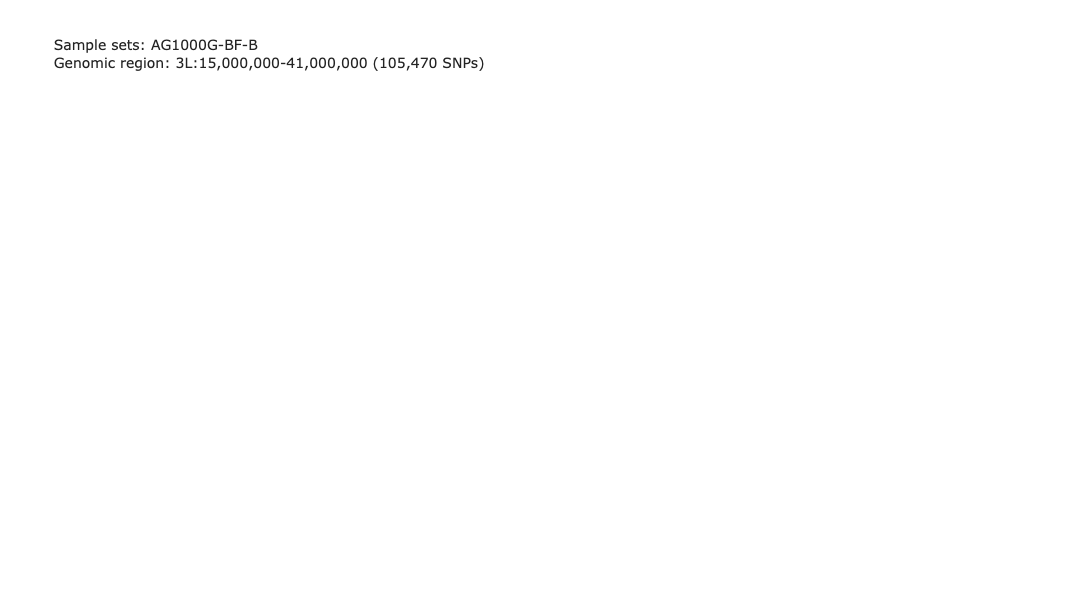

In [8]:
ag3.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = "AG1000G-BF-B",
    color="taxon",
)

By colouring our leaves by taxon (`color="taxon"`) we can see three taxa each forming clusters of closely related individuals with short branch lengths including *An. gambiae*, *An. coluzzii* and *An. arabiensis*. The branch length connecting *An. arabiensis* to the other taxa is the longest. This is because it is more distantly related to *An. coluzzii* and *An. gambiae*, _i.e._, there were more pairwise differences and therefore a higher distance value on comparison with the other species. Note that 101,077 SNPs were used here. The number of SNPs for analysis (100,000) is not exact because the specified region for SNP discovery is evenly thinned to provide a close approximation.

**Exercise 1.**

Re-run the NJT for Burkina Faso, but this time construct the tree using the X chromosome. How does this change the phylogeny? What are the possible reasons for this?


# Analysis example - population structure of *An. gambiae* in East Africa

Next we'll investigate population (within taxa) structure using the same region of the 3L chromosome arm as we used for the taxonomic analysis above. Let's explore whether we observe population structure in Tanzanian *An. gambiae*. We will restrict our analysis to this taxa using the sample query parameter. Since we are now looking within-species we might want to colour our samples by the location from which they originate.

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = "AG1000G-TZ",
    sample_query="taxon == 'gambiae'",
    color="location",
)

In the tree we clearly have two clusters of closely related *An. gambiae* , one including individuals from Muleba in the northwest and another with individuals from Muheza located on the eastern coast likely resulting from restricted gene flow between the two regions _i.e._, geographic isolation.

Let's add *An. gambiae* data from Kenya into our analysis to see how this relates to the structure observed in Tanzania by first colouring the samples by country.

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = ["AG1000G-TZ","AG1000G-KE"],
    sample_query="taxon == 'gambiae'",
    color="country",
)

We can see that the samples from Kenya fall into just one cluster of samples originating from Tanzania. Let's explore the location of these samples by changing the color parameter to see how this might relate to geography.

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = ["AG1000G-TZ","AG1000G-KE"],
    sample_query="taxon == 'gambiae'",
    color="location",
)

Now we can see that the samples from Kenya are from Kilifi on the east coast. The Tanzanian samples with which they cluster originate Muheza, which is also located on the east coast. If we consider the geography of East Africa, the Great Rift Valley and Lake Victoria are potential barriers which might restrict mosquito movement and therefore gene flow between the coast and inland East Africa.

**Exercise 2.**

Add in the East African population cohort of Mayotte ("AG1000G-FR") into your NJT of East African populations. Where does this population cohort fall and how would you explain your findings considering this is an island population?

# Analysis example - Population structure in West Africa

Let's see if we also observe population structure in *An. gambiae* from "Far West" Africa, including samples from Guinea Bissau, The Gambia, Guinea and Mali.

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=100_000,
    sample_sets=['AG1000G-GM-C', 'AG1000G-GN-B','AG1000G-GW'],
    sample_query="taxon == 'gambiae'",
    color="country",
)

All individuals of *An gambiae* from the Far West Africa form a single cluster with mixed geographical origin. There is therefore no population structure detected across the region and individuals are expected to undergo unrestricted gene flow.

Let's compare what we see for *An. gambiae* to *An. coluzzii* from Far West Africa.

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=100_000,
    sample_sets=['AG1000G-GM-C', 'AG1000G-GN-B','AG1000G-GW'],
    sample_query="taxon == 'coluzzii'",
    color="country",
)

On first glance samples appear to form a single cluster but are clearly ordered by geographical origin, suggesting that *An. coluzzii* in Far West Africa are locally structured. If we zoom in on the plot, we see that there is in fact a distinction between these samples, with individuals from each country forming clusters seperated by short branches. Therefore, we see evidence for some restricted gene flow among *An. coluzzii* in Far West Africa. This is in constrast to what we saw from *An. gambiae* because we did not see any population structure across the same region. The difference we see could reflects differences in species ecology and dispersal. For example, *An. gambiae* oviposit in temporary water bodies and need to disperse to find these habitats. *An. coluzzii* however, tend to oviposit in permenant water bodies such as rice paddies and may not need to disperse as often or as far. However, it is worth noting that the situation is not always so simple since there is evidence to suggest *An. coluzzii* can also undergo long range airborne dispersal ([Lehmann *et al.* 2017](https://doi.org/10.1111/eva.12486)).

**Exercise 3.**

Investigate population structure in *An. coluzzii* from the West African countries of Burkina Faso, Cote D'Ivoire, Ghana ('AG1000G-BF-B', 'AG1000G-CI', 'AG1000G-GH'). Do you observe geographical population structure? How does this compare to the situation in Far West Africa?

# Principal Components Analysis

Another method which is commonly used to visualise genomic variation in the data is principal components analysis (PCA). PCA is a method for reducing the dimensions of the variation found within a dataset to help make interpreting the data easier. Typically we use a region of genomic data (_e.g._ a chomosome arm) which might have millions of SNPs (from hundreds or thousands of samples). The PCA finds axes through the data that describe its variance, in the case of genomic data, this effectively collapses thousands or millions of dimensions (SNPs) down to a handful of __principal components__ (PCs) that describe structure in the data. On a PCA plot, individuals which have a similar genomic composition are clustered together while those which seperate out on the plot can indicate a degree of population structure due to reproductive isolation.

Let's take a look at the sample set we used to investigate taxonomic structure in Burkina Faso using PCA. We will use the `ag3.pca` function to calculate our PCA. This function returns two objects, so we need to assign two variables to it. The first is a dataframe containing 20 PCs and the second is an array containing the percentage of variance in the data which is explained by each PC.

In [ ]:
pca_bf_df, evr_bf = ag3.pca(
    region=region,
    n_snps=n_snps,
    sample_sets="AG1000G-BF-B",
)

## Plotting explained variance

Let's have a look at the explained variance output (`evr_bf`). We can see that this is an array of 20 floats (numbers with decimal points). These are the percentage of variance in the dataset explained by each of our 20 principal components

In [ ]:
evr_bf

We can use the variance explained array to get an intuition for which PCs to examine. The easiest way to do this is to plot our `evr_bf` array in the form of a bar chart. We have a handy function in `malariagen_data` to do this for us. Again, this is an interactive plot and hovering the pointer over a bar will reveal the exact explained variance percentage.

In [ ]:
ag3.plot_pca_variance(evr_bf)

In this example, the first principal component explains around 2.5% of the variance and the second around 2.25%, whereas all of the subsequent principal components explain less than 1.5% of the variance. The __absolute magnitude of these values is less important__ as this will change depending on what dataset we analyse. What is more important, however, is the fact that PCs 1 and 2 relatively explain much more variance than the subsequent PCs. In other words, there is a big step down from PC2 to PC3, then the variance explained flattens off. This is a good indication that these first two PCs are capturing some real structure in the data, and that the rest of the PCs are potentially just noise.

There are various statistical methods for formally testing whether a principal component conveys a real signal of population structure or is just random noise (for example see [Patterson et al. 2006](https://doi.org/10.1371/journal.pgen.0020190) and [Forkman et al. 2019](https://doi.org/10.1007/s13253-019-00355-5)). However, for exploratory analyses, __looking at the differences in variance explained between the adjacent PCs, and ignoring the tail of PCs where the variance flattens off, is not a bad rule of thumb__.

## Plotting principal components

We can visualise our analysis by making a scatter plot of the principal components for each sample, _e.g._, PC1 and PC2. The first two principal components are often sufficient to explore the data and are used by default when applying the function. Higher principal components can be visualised using the `x=` and `y=` parameters _e.g._ `x="PC3", y="PC4"`. Here we will colour the points by taxon to allow investigation of taxonomic structure.

In [ ]:
ag3.plot_pca_coords(
    pca_bf_df,
    color="taxon",
    title="Taxonomic structure in Burkina Faso"
)

On the PCA plot each point represents an individual sample. Let's plot the NJT for the Burkina Faso sample set again, so that we can compare our findings.

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = "AG1000G-BF-B",
    color="taxon",
)

Within both the NJT and PCA plot we see three groups seperating out the different taxon. *An. arabiensis* appears further away on the NJT and PCA plot than *An. gambiae* and *An. coluzzii* reflecting their evolutionary history. Since *An. gambiae* and *An. coluzzii* are more closely related, we expect them to share more SNPs. However, there is an important difference in how NJT and PCA are interpreted. The length of branches on the NJT are based on a measureable distance. That is, they are scaled to the number of genetic differences, _i.e_, SNPs, between individuals on the tree. In comparison, the location of individuals on the PCA plot do not represent genetic distance as an absolute measurement. For example, while we can say that *An. arabiensis* are more genetically different than  *An. gambiae* and *An. coluzzii*, this is based on relative distance and we cannot say by how much.

Next we'll try PCA to look at population structure, as we did for the sample set from Tanzania. Similar to the NJT, we will use a sample query to restrict our analysis to *An. gambiae*. This time, we will colour the PCA plot by location to investigate geographical structure across Tanzania. We will also plot the NJT we computed earlier for comparison.

In [ ]:
pca_tz_df, evr_tz = ag3.pca(
    region=region,
    n_snps=n_snps,
    sample_sets="AG1000G-TZ",
    sample_query="taxon == 'gambiae'",
)

In [ ]:
ag3.plot_pca_coords(
    pca_tz_df,
    color="location",
    title="Population structure in Tanzania"
)

In [ ]:
ag3.plot_njt(
    region=region,
    n_snps=n_snps,
    sample_sets = "AG1000G-TZ",
    sample_query="taxon == 'gambiae'",
    color="location",
)

In the NJT we see two clusters seperating samples from Muleba and Muheza in Tanzania indicating restricted gene flow between inland and coastal *An. gambiae*. On the PCA plot, we also see *An. gambiae* from these two locations form their own distinct clusters. Because mosquitoes from Muleba cluster closely on the plot, we can infer that samples from Muleba are more genetically similar to one another than they are to Muheza, and vice versa.

Often, running more than one type of analysis can help with interpretation and in this case, both the results from NJT and PCA are concurrent. We can be more confident that we have found a signal of population structure seperating inland Muleba from coastal Muheza. This is an example of how performing mutliple analysis can help to strengthen the evidence for your findings.

**Exercise 4.**

Run a PCA to investigate geographical population structure for populations in East Africa _i.e._, by adding the parameter `sample_sets=["AG1000G-TZ","AG1000G-KE", "AG1000G-UG"]`. How would you interpret this plot? Do results concur with findings from the NJT?

##Well done!
In this module we have run neighbour-joining trees across different mosquito cohorts and interpreted the results to discover taxonomic and geographic population structure.

**Exercises (English)**

Open this notebook in Google Colab and run it for yourself from top to bottom. As you run through the notebook, cell by cell, think about what each cell is doing, and try the practical exercises along the way.

Have go at the practical exercises, but please don’t worry if you don’t have time to do them all during the practical session, and please ask the teaching assistants for help if you are stuck.

Hint: To open the notebook in Google Colab, click the rocket icon at the top of the page, then select “Colab” from the drop-down menu.

**Exercises (Français)**

Ouvrir ce notebook dans Google Colab et l’exécuter vous-même du début à la fin. Pendant que vous exécutez le notebook, cellule par cellule, pensez à ce que chaque cellule fait et essayez de faire les exercices quand vous les rencontrez.

Essayez de faire les exercices mais ne vous inquiétez pas si vous n’avez pas le temps de tout faire pendant la séance appliquée et n’hésitez pas à demander aux enseignants assistants si vous avez besoin d’aide parce que vous êtes bloqués.

Indice: Pour ouvrir le notebook dans Google Colab, cliquer sur l’icône de fusée au sommet de cette page puis choisissez “Colab” dans le menu déroulant.

